In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

C:\Users\Alexander\AppData\Local\Temp\ipykernel_10524\2748227371.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.flatten(),256,[0,256], color = 'r')


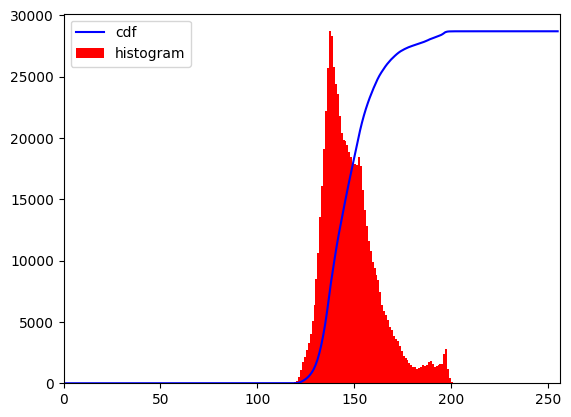

In [2]:
img = cv.imread('../../img/valley.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [3]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

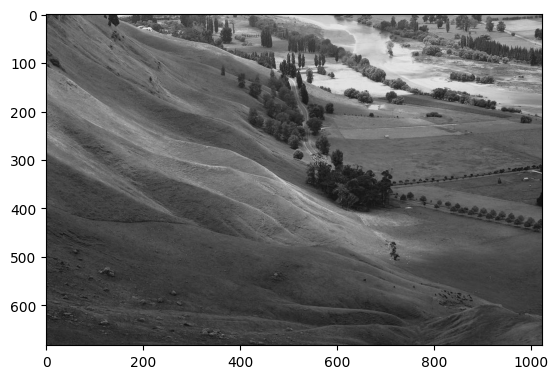

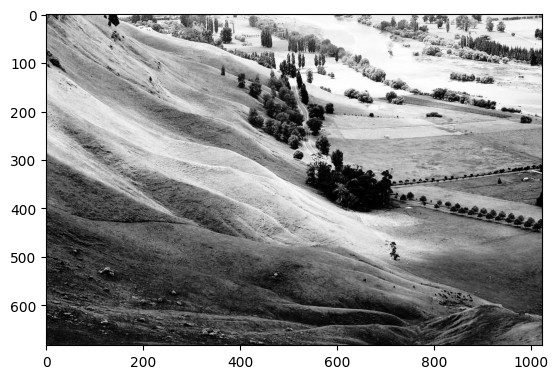

In [7]:
img2 = cdf[img]
plt.imshow(img, 'gray')
plt.show()
plt.imshow(img2, 'gray')

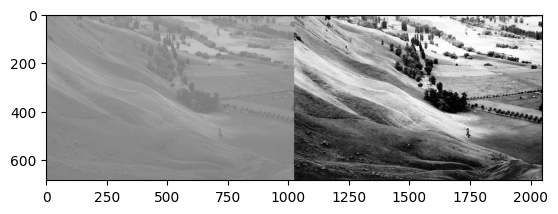

In [8]:
img = cv.imread('../../img/valley.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res, 'gray')

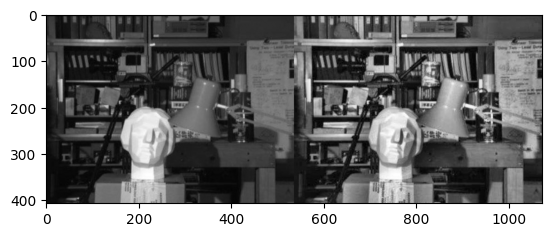

In [ ]:
img = cv.imread('../../img/head.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a CLAHE object (Arguments are optional).
#cliplimit - сколько пикселей опр. яркости может буть, tilegridsize - на какие клетки
# разбивать изображение
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
res = np.hstack((img,cl1)) #stacking images side-by-side
plt.imshow(res, 'gray')